In [35]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [36]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [37]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)

In [39]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=10000)

In [40]:
cls.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [41]:
y_pred = cls.predict(x_test)

In [42]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[97, 11],
       [27, 19]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

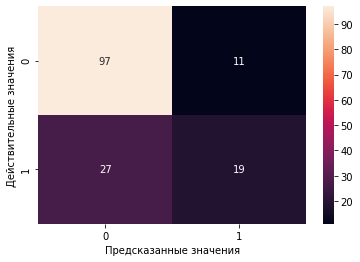

In [43]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


In [44]:
metrics.accuracy_score(y_test, y_pred)

0.7532467532467533

In [45]:
metrics.precision_score(y_test, y_pred)

0.6333333333333333

In [46]:
metrics.recall_score(y_test, y_pred)

0.41304347826086957

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       108
           1       0.63      0.41      0.50        46

    accuracy                           0.75       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.74      0.75      0.74       154



#### 1.	Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?

#### 2.	Чем логистическая регрессия отличается от линейной?

#### 3.	С помощью каких методов происходит оптимизация параметров логистической регрессии?

#### 4.	Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?

#### 5.	Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?

#### 6.	Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?

#### 7.	В чем особенности метода ближайших соседей?

## Дополнительные задания

### 1.	Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

In [48]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

In [49]:
svm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [50]:
y_pred = svm.predict(x_test)

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[97, 11],
       [34, 12]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

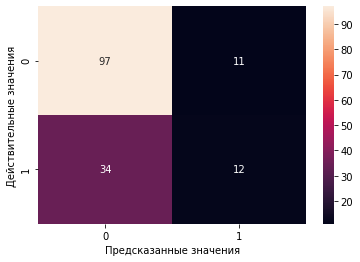

In [52]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       108
           1       0.52      0.26      0.35        46

    accuracy                           0.71       154
   macro avg       0.63      0.58      0.58       154
weighted avg       0.68      0.71      0.67       154



### 2.	Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

Значения true-negative и false-positive у обоих моделей одинаковые. Однако значения true-positive и false-negative у модели, основанной на методе опорных векторов лучше.

<h3> 3.	Постройте модели классификации на основе следующих методов:</h3>
<h5>
<p>a.	логистическая регрессия (LogisticRegression);
<p>b.	метод опорных векторов с линейным ядром (SVC);
<p>c.	метод опорных векторов с гауссовым ядром (SVC);
<p>d.	метод k ближайших соседей (KNeighborsClassifier);
<p>e.	многослойный перцептрон (MLP);
<p>f.	другие методы по желанию;
</h5>
